In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]


model = LinearRegression() 

#Your code:

model.fit(X,y)

#Hint: .fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
"""
A model, which is based on regression model, was trained on X and y.
"""

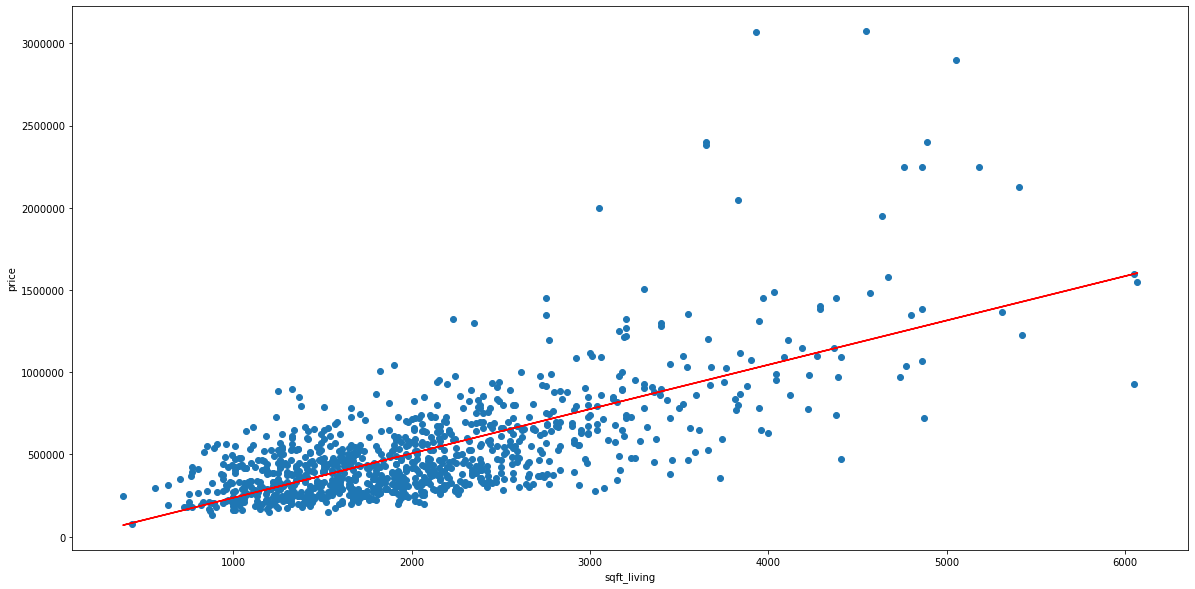

Mean Squared error equals:  57947526161.288376
0.496708801663114


In [ ]:
#b)

#Your code:

Y = model.predict(X)
model.intercept_
model.coef_
model.score(X,y)

plt.figure(figsize=(20,10))

plt.scatter(X,y)
plt.plot(X, Y, color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.ticklabel_format(axis='y', style="plain")
plt.show()

print("Mean Squared error equals: ", mean_squared_error(y,Y))
print(model.score(X,y))


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

In [ ]:
"""
Based on the plot, it can be conluced that the most dense place is situated between 1000 and 3000 sqft and a price under 1000000. 
In generally, the plot runs betweenn two, a quite similiar sides, only near its end part we don't see that dependece.
score() is close to 0.5, so it can be said, that the model is not the best.
"""

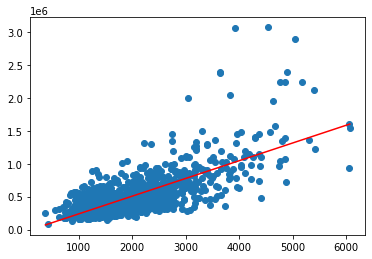

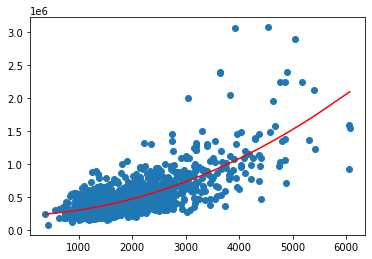

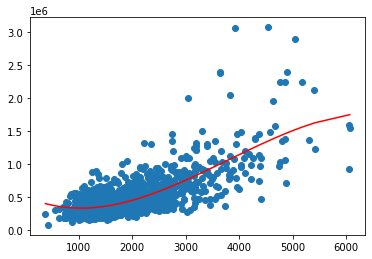

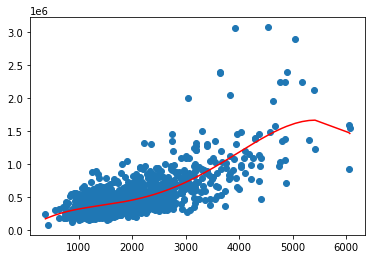

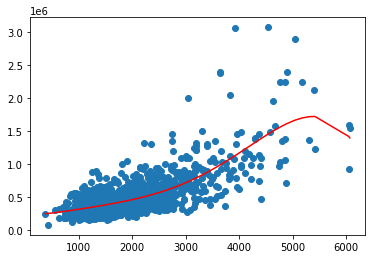

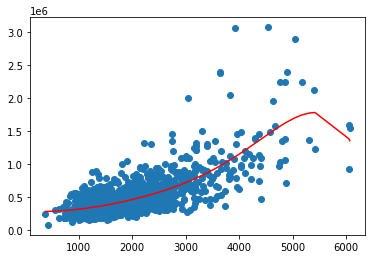

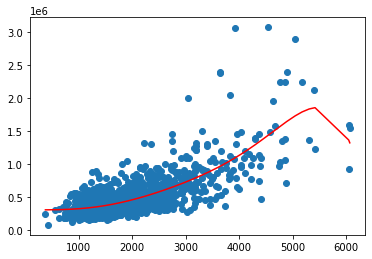

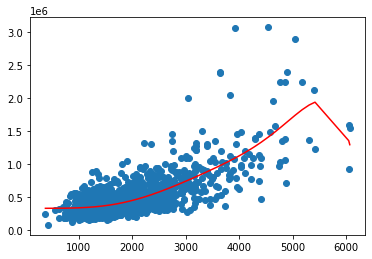

In [ ]:

Y_error = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    _ = model.fit(X_order,y)
    Y_order = model.predict(X_order)

    axes, ys = zip(*sorted(zip(X_order[:,0], Y_order)))

    plt.plot(axes,ys,color='red')
    plt.scatter(X,y)
    
    Y_error.append(mean_squared_error(y,Y_order)) 

    plt.show()

In [ ]:
"""
It can be noticed, that along with higer polynomial degrees, the plot 'are fitting' better to our data and 
'are coming closer' to bigger clusters and not just divide data to two sides.
The plot is also better in case of rare clusters, it is more accurate. 
"""

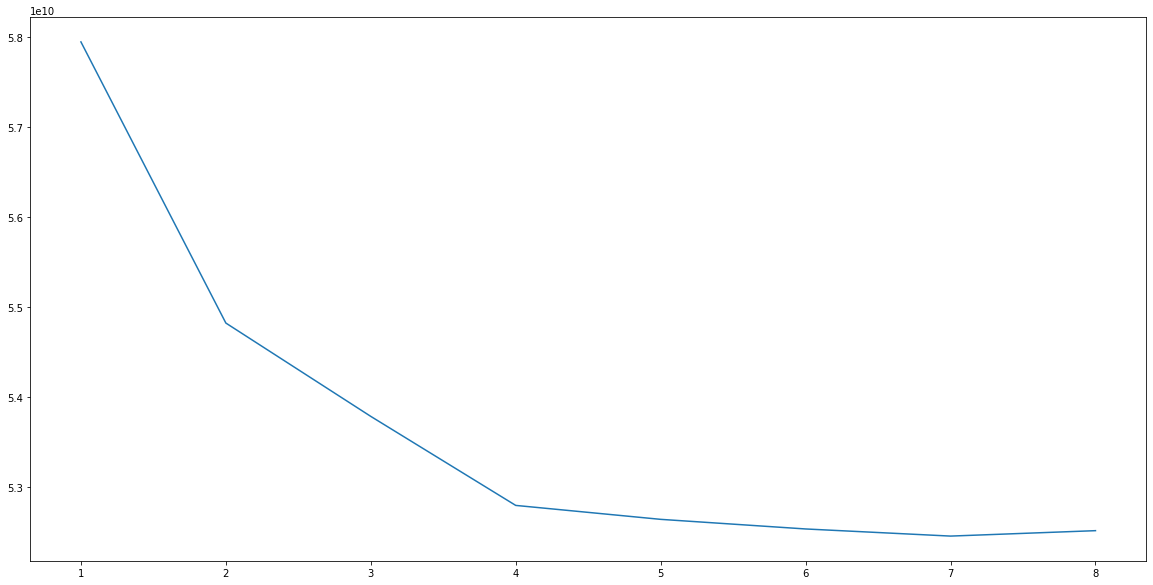

In [ ]:
#Your code:

xs = []

for i in range(1,9):
    xs.append(i)

plt.figure(figsize=(20,10))
plt.plot(xs,Y_error)
plt.show()


In [ ]:
"""
Along with successive steps, MSE is decreasing, because the plot is more accurate and runs closer to the points or their bigger clusers.
"""

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

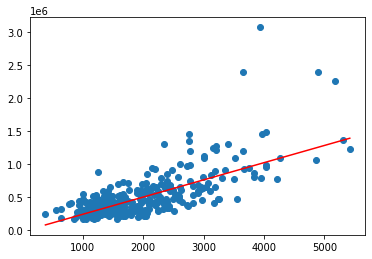

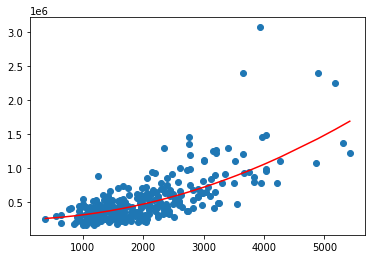

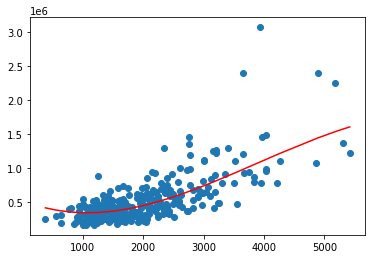

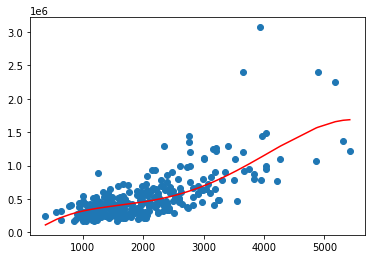

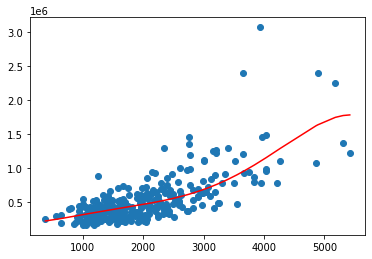

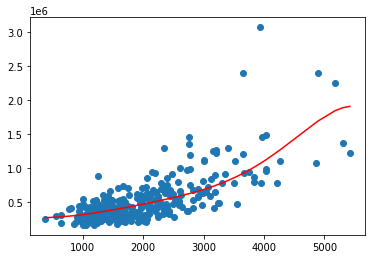

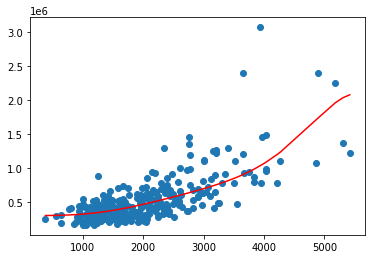

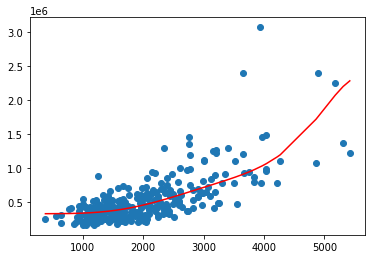

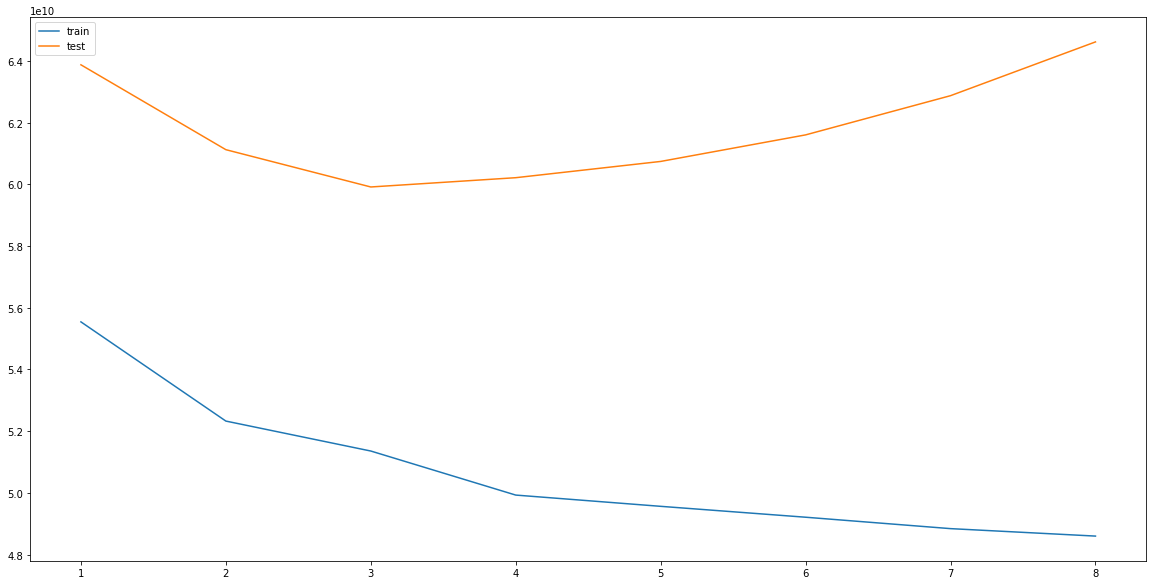

In [ ]:
#a)

train_error = []
test_error = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    _ = model.fit(X_train, y_train)

    Y_trained = model.predict(X_train)
    Y_order = model.predict(X_test)

    train_error.append(mean_squared_error(Y_trained, y_train))
    test_error.append(mean_squared_error(y_test,Y_order))

    axes, ys = zip(*sorted(zip(X_test[:,0], Y_order)))

    plt.scatter(X_test[:,0], y_test)
    plt.plot(axes, ys, color = 'red')
    plt.show()
    
plt.figure(figsize=(20,10))
plt.plot(xs, train_error, label ='train')
plt.plot(xs, test_error, label = 'test')
plt.legend()
plt.show()
    

In [ ]:
"""
After dividng the data to train_set and test_set, the model is able to make better predictions on training set than on testing set.
This is due to the fact that the model is already know the data in which it has to make predticion, 
than when the model gets training set for the first time. The effect is that, on the plot which is comparing MSE of polynomials,
the MSE plot, which is becoming from training set, is placed lower than the MSE plot from testing set. 
The prediction plot runs a quite close for testing set, but also we can see that higher degree of polynomial
isn't implied a better fit or a lower MSE.
"""

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

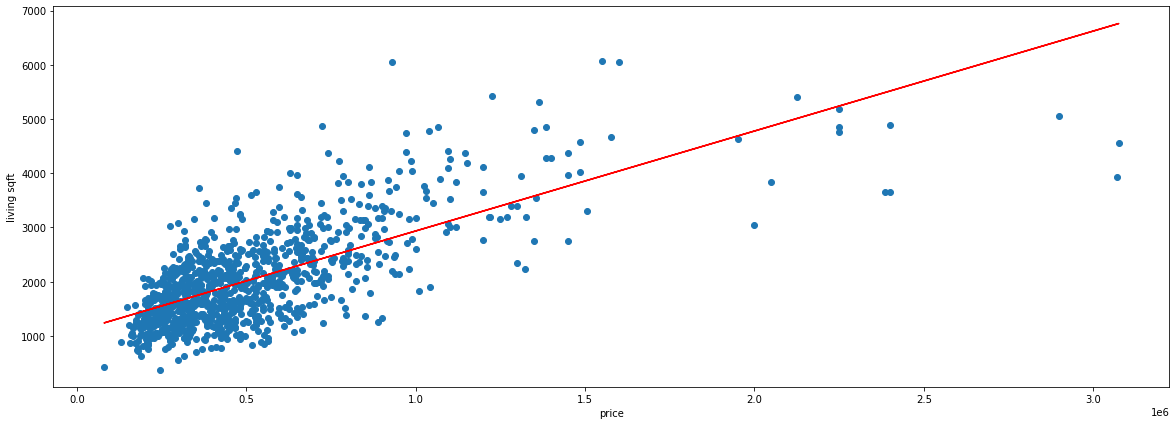

Mean squared error:  396407.1889615157


In [ ]:
#a)
#Your code:

model.fit(y.reshape(-1,1),X.reshape(-1))

Y_sqft = model.predict(y.reshape(-1,1))

plt.figure(figsize=(20,7))
plt.xlabel('price')
plt.ylabel('living sqft')
plt.plot(y.reshape(-1,1),Y_sqft,color='red')
plt.scatter(y,X)
plt.show()

print('Mean squared error: ', mean_squared_error(X.reshape(-1),Y_sqft))



In [ ]:
"""
It can be noticed that MSE in case of making predictions of 'sqft_living' for 'price' is lower than in case of 
making predictions of 'price' for 'sqft_living'. Comparsing both plots, it can be seen that, in this case, the points
are more concetrated than the first case.
It gives the conclusion - it is easier to make a good predtiction what sqft_living is when you have a price, than
make prediction what a price is when you have sqft_living.
"""

In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

#Your model:


X = house_df[['sqft_living', 'sqft_lot','grade', 'yr_built', 'yr_renovated', 'view']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749267368.97092
Mean squared error equals: 40533350675.03723


In [ ]:
"""
First of all, the good idea is to decrease test_size, so our model will have more data to learn, so their predictions 
will be better. We can add more features, so the model will be able to see some dependencies. 
We choose that polynomial degree, where MSE is the lowest.
"""